# Experiment 1: Sentiment Classification
## Source Task: Amazon
## Target Task: Twitter

In [1]:
from flair.models.text_classification_model import TARSClassifier
from flair.data import Sentence
import pandas as pd 
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
# GRAKA auswählen
import flair, torch
flair.device = torch.device('cuda:1') 

# Labelbezeichner: Oneword

In [3]:
base_path = '/vol/fob-vol7/nebenf19/samahakk'
#base_path = !pwd
base_path = base_path + '/masterarbeit_experiment2'

In [4]:
# 1. Load Testset
dt = pd.read_csv(base_path + '/sentiment_twitter/oneword/dev.csv')
labels = dt['label']
text = dt['text']

# 2. Load Model
tars = TARSClassifier.load(base_path + '/sentiment_amazon/model/best-model.pt')

# 3. Run Test
results = []
classes = ['positive', 'neutral', 'negative']

for sentence in text:
       sequence = Sentence(sentence)

       tars.predict_zero_shot(sequence, classes, multi_label = False)
       label = sequence.labels[0].value
       results.append(label)
       print(label)

# 4. Evaluate Results
y_true = labels
y_pred = results

report = classification_report(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred, labels = ['positive', 'neutral', 'negative'])
fisher = f1_score(y_true, y_pred, average='weighted')

2021-09-08 15:18:29,038 loading file /vol/fob-vol7/nebenf19/samahakk/masterarbeit_experiment2/sentiment_amazon/model/best-model.pt
init TARS
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
negative
neutral
negative
neutral
positive
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
negative
positive
neutral
neutral
neutral
neutral
neutral
negative
neutral
neutral
neutral
negative
negative
neutral
neutral
neutral
positive
neutral
neutral
negative
negative
neutral
neutral
negative
neutral
neutral
negative
neutral
neutral
neutral
negative
negative
neutral
neutral
negative
positive
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
negative
negative
neutral
neutral
negative
positive
negative
neutral
neutral
neutral
negative
neutral
negative
positive
neutral
positive
neutral
neutral
positive
neutral
neutral
neutral
positive
positive
neutral
positive
negative
negative
neutral
neutral
negative
neutral
positive
neutral
positive
neutral


neutral
neutral
positive
neutral
positive
neutral
negative
positive
negative
positive
positive
neutral
neutral
neutral
negative
negative
neutral
neutral
negative
neutral
negative
neutral
neutral
negative
positive
neutral
negative
negative
neutral
negative
neutral
neutral
positive
negative
neutral
neutral
negative
positive
neutral
positive
neutral
neutral
negative
positive
neutral
negative
positive
neutral
neutral
neutral
neutral
neutral
neutral
neutral
negative
negative
positive
neutral
neutral
negative
neutral
neutral
negative
negative
neutral
neutral
neutral


In [5]:
print(report)

              precision    recall  f1-score   support

    negative       0.34      0.27      0.30       338
     neutral       0.37      0.69      0.48       345
    positive       0.44      0.16      0.23       347

    accuracy                           0.37      1030
   macro avg       0.38      0.37      0.34      1030
weighted avg       0.38      0.37      0.34      1030



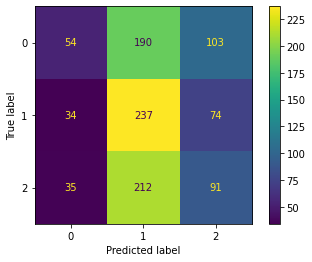

In [6]:
cm_display = ConfusionMatrixDisplay(cm).plot()

# Labelbezeichner: Interpretation

In [7]:
# 1. Load Testset
dt = pd.read_csv(base_path + '/sentiment_twitter/interpretation/dev.csv')
labels = dt['label']
text = dt['text']

# 2. Load Model
tars = TARSClassifier.load(base_path + '/sentiment_amazon/model/best-model.pt')

# 3. Run Test
results = []
classes = ['This text entails a positive sentiment', 'This text entails a neutral sentiment', 
           'This text entails a negative sentiment']

for sentence in text:
       sequence = Sentence(sentence)

       tars.predict_zero_shot(sequence, classes, multi_label = False)
       print(sequence)
       label = sequence.labels[0].value
       results.append(label)
       print(label)

# 4. Evaluate Results
y_true = labels
y_pred = results

report = classification_report(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
fisher = f1_score(y_true, y_pred, average='weighted')

2021-09-08 15:18:49,341 loading file /vol/fob-vol7/nebenf19/samahakk/masterarbeit_experiment2/sentiment_amazon/model/best-model.pt
init TARS
Sentence: "# draintheswamp is looking a lot like filling it w elite insiders billionaires . Voting against the establishment , eh ?"   [− Tokens: 21  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "I # StandwithKim Davis . I hope you are happy that Christians are being jailed and livelyhoods destroyed because you ignored 9th & amp ; 10th Amend"   [− Tokens: 27  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "I 'm not a sone . Not a Jessica biased . Not a seohyun biased . But seeing seohyun cried during the 1st fanmeet w / o Jessica makes me cry"   [− Tokens: 31  − Sentence-Labels: {'label': [This text entails a positive sentiment (0.3354)]}]
This text entails a positive sentiment
Sentence

Sentence: "@ user @ user yes i see . the stormfront idiots callhim the 4th reiche dont they know his son & amp ; law is jewish ? they have property in israel ?"   [− Tokens: 33  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "@ user an Egyptian source which only says it 's considered false . There have been videos also perpetuating Friday 's Eid as wrong ."   [− Tokens: 25  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Hashid al-Shaabi militia control 3 villages West of Mosul ... # MosulOffensive"   [− Tokens: 12  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "" Why horrible why does the Rugby World Cup have to be here in October ? I 'm gonna be battling my bday , Soul Punk and people running in circles ""   [− Tokens: 32  − Sentence-Labels: {'

Sentence: "How can Tony Blair get invited at ' Remembrance ' Sunday and there was no invite for the Merchant Navy by David Cameron ? ' Disgusting ' !"   [− Tokens: 28  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Day 6 - Most annoying character : Ashley Graham ( Resident Evil 4 )"   [− Tokens: 14  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "@ user In 5th grade I fell down some stairs , fractured my left leg , got a concussion . The next day I bought the full Twilight series ""   [− Tokens: 30  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Fuck the Un # UnitedNations for what the jew is doing to Palestine . Now the world knows why the Hero Hitler burned the fucking jews alive ."   [− Tokens: 28  − Sentence-Labels: {'label': [This text enta

Sentence: "" SP to support UPA , but oppose anti-people policies : Samajwadi Party on Saturday said it will continue to oppose ..."   [− Tokens: 22  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "@ user @ user Iran 's job is EASY. . stop building Nukes. . stop executing Christians and dropping Gays off the 6th floor head first ."   [− Tokens: 27  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "@ user you cant fuck the ugly away , Melania Trump tried ... and this was the result"   [− Tokens: 18  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "@ user they are saying if they don \ u2019t put the Winter Classic on lock tomorrow with Michigan - we won \ u2019t even have a season :("   [− Tokens: 29  − Sentence-Labels: {'label': [This text entails a ne

Sentence: "Caitlyn Jenner may be charged with vehicular manslaughter Guess women really ca n't drive"   [− Tokens: 14  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Pope Francis could 've privately answered the 5 yes ?/ no ? questions the cardinals originally posed PRIVATELY . …"   [− Tokens: 20  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "" I guess with DJ it 's a Sunday thing and not a final round thing , and Paul Dunne ? Are you kidding me ? # OpenChampionship ""   [− Tokens: 29  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Trump has n't even been sworn in yet & the media wants to call potential saves , failures . Meanwhile , Obama admin still blaming sh * t on Bush ."   [− Tokens: 31  − Sentence-Labels: {'label': [This text entails a 

Sentence: "@ user @ user we are not giving Steve Bannon a pass !"   [− Tokens: 13  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "@ user And do n't bother trying to impose a Sabbath worship of Sunday or you will find yourself facing a hostile world of CHRISTIANS ."   [− Tokens: 26  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "@ user @ user @ user @ user result of libs experiments : millions dead , countries destroye …"   [− Tokens: 19  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Raul Castro announced that Cuba would not be allowed to name any streets or monuments after Fidel to " avoid a cult of personality " - ABC News"   [− Tokens: 28  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neu

Sentence: "@ user Show me on google maps where the FEMA camps are . Otherwise you 're a MSM nazi democrat propagandist !"   [− Tokens: 22  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Ronaldo was subjected to homophobic slurs at the Camp Nou again as some fans sang - ‘ Cristiano come out of the closet’ during Clasico"   [− Tokens: 25  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "@ user @ user And everybody wondered what kind of rabbit hole we were going down in legalizing gay marriage ."   [− Tokens: 21  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "and i 'm not rich of course there 's a reason we 're only going saturday which also meant no kim and briana photo for us lol"   [− Tokens: 27  − Sentence-Labels: {'label': [This text entails a 

Sentence: "" Hulk Hogan is a racist , Bill Cosby is a rapist , Jon Stewart is off the air and Donald Trump may actually become president WHAT IS GOING ON ? !""   [− Tokens: 32  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "@ user There 's a bunch but : Pain in My HeartMBDTF & College DropoutFreewheelin ' Bob DylanRidin ' Dirty ( H-Town ) Pet Sounds"   [− Tokens: 25  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "@ user @ user what 's scary is that it was only 5-4 . Like our SCOTUS , Irving may flip on one vote ."   [− Tokens: 25  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Secret recordings reveal Dublin pregnancy centre advising women that abortion leads to # breastcancer . # repealthe8th"   [− Tokens: 17  − Sentence-Labels: {'label': [Thi

Sentence: "@ user Pak hide behind foreign countries rippled with religious wars rhetoric for drone strikes that radicalise every community upon wh"   [− Tokens: 21  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "When @ user sets up his wall / fence on the Mexican border , I hope he ’s going to include hedgehog highways ."   [− Tokens: 24  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "@ user @ user 😁 Maduro , Hollande , Merkel,Santos , they will fall flat on their metaphorical , if not physical faces , or both ."   [− Tokens: 27  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "RT @ user Final Destination 5 ? ! Look man its gone far enough allow it & lt ; I did n't know a 4th existed :/ Ahh"   [− Tokens: 28  − Sentence-Labels: {'label': [This tex

Sentence: "Can Dems take off their blinders abt Obama ? He lets the state brutalize & evict First Americans so Dem Donors can a …"   [− Tokens: 24  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "@ user If the Communist @ user likes Donald Trump , I may have to rethink things ."   [− Tokens: 18  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "" Cyber-squatter accuses Carly Fiorina of wishing she 'd laid off 30,000 employees more quickly | PolitiFact"   [− Tokens: 17  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Trump eschews Ivy Leagues in favor of business acumen for cabinet via the @ user App LOL ! Dumbest president ever ."   [− Tokens: 22  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neu

Sentence: "@ user This is something you should read , and take dead serious . # Trump # KeepElectoralCollegeRead :"   [− Tokens: 19  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "FYI @ user @ user @ user " DrainTheSwampAlert " ! # NeverRomney sums it up for me . …"   [− Tokens: 20  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: ". @ user @ user is a disgrace . Supported Wall St candidate . Whole career has been fraudulent ."   [− Tokens: 20  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "@ user smh I \ u2019m just waiting on the black ppl to cuss me out tomorrow about Denzel lol NIGGAS !! !"   [− Tokens: 23  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "*@ Snowfl

Sentence: "" Murray is outshooting St. Mary 6-4 in the 21st minute , but still no score . ""   [− Tokens: 18  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "@ user @ user not the 1st time ... thr are 2billion kpop fans worldwide , Queens may be small , kpop is n't"   [− Tokens: 24  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Mick Jagger with the Monday Night Football song # swagswagswag"   [− Tokens: 10  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "KKL-JNF International Expo Mission to Milan : The Expo 2015 exhibition opened in Milan on May 1st and it will c ..."   [− Tokens: 22  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "France : Fillon nominated to batt

Sentence: "UN close to sanctions deal to slash North Korea export earnings : diplomatsNorth Korean leader Kim Jong Un takes ..."   [− Tokens: 20  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "@ user so if Martin gets 15 in the first three quarters and none in the 4th when Harden usually takes over he had the same impact ?"   [− Tokens: 28  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "So according to Martial Law act , the 2016 election may not happen Obama might stay in office ..."   [− Tokens: 19  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Black Ops III Beta looked a lot better on PS4 than on Xbox One . I hope that is n't the case come November ."   [− Tokens: 25  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.335

Sentence: "THE FIGHT OF Lionel Messi vs Cristiano Ronaldo // goals,skills,dribbling /// Epic Battle 2016 HD : via @ user"   [− Tokens: 19  − Sentence-Labels: {'label': [This text entails a positive sentiment (0.3354)]}]
This text entails a positive sentiment
Sentence: "Steven Seagal Meets With Putin , Gets Russian Passport"   [− Tokens: 9  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Xi Jimping , Kim Jong Un , Nicolas Maduro , Robert Mugabe , Sisi , Bashar Al Assad all " won " their elections by 99 % votes"   [− Tokens: 28  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Obama was adopted by Dumham 's 2nd husband Soetero and his name changed to Barry Soetero . No record it was changed Bj"   [− Tokens: 23  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Se

Sentence: "Last Man Standing Season 2 Premieres November 2nd on ABC with an Election Theme via @ user"   [− Tokens: 17  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "@ user @ user Nothing says racial justice like defending voter suppression as good when democrats do it ."   [− Tokens: 19  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "If this is my last tweet I died in a airplane crash if not then I 'll be at the Red Sox game tomorrow ."   [− Tokens: 25  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Gucci raft conscience pomposity june wave the bifurcated thine body at accruement until special pleading vivid ..."   [− Tokens: 17  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentim

Sentence: "Can someone spoil me please ? !"   [− Tokens: 7  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "" I was in the paper Sunday . cuz of that I 've had Dr.Hook's Rolling Stone in my head . They asked me my claim to fame , I say opening for bobcat ""   [− Tokens: 35  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "" I 'm gonna start listening to Metric now , so I can see them at Bluesfest on the 15th . ""   [− Tokens: 22  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "" Tia Sharp : cause of death may never be known - well they would have known it , had they found the body when they first search her house . ""   [− Tokens: 32  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentime

Sentence: "' Dana White ' appeared on Sunday 13 at the 20th place in the Top20 of Miami 's Trends : # trndnl"   [− Tokens: 22  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Stefan Sabol with his 3rd hit and 3rd RBI knocks in David Wright to give St.Lucie a 5-2 lead ."   [− Tokens: 20  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "" Planned Parenthood Subject of Nationwide Protest on Saturday // If Christians should ever protest , now is the time ."   [− Tokens: 21  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "My last thursday of 2015 in MIlan. . ! see you tonight at 11Clubroom !"   [− Tokens: 15  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "" Bogey , bogey s

Sentence: ".@ AndriyParubiy : .@ poroshenko Ready To Alter Recommendation For Appointment Of CEC Members"   [− Tokens: 14  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Govt-shutdown caucus may not be ready to go to the mattresses over Planned Parenthood ."   [− Tokens: 15  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Who is going to the Jason Aldean & amp ; Kenny Chesney concert tomorrow ?"   [− Tokens: 15  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "" Kanye West will perform the entire 808s & amp ; Heartbreak "" Album on September 25th at the Hollywood Bowl in Los Angeles ."   [− Tokens: 25  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Melania 's speech 

Sentence: "@ user i remember wen i saw u Jan 10 2011 i was @ Northern LIghts in Albany and i was way in the back and u waved to me ilu follow me !"   [− Tokens: 34  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "" Tomorrow 's field trip day , so I deserve Dunkin bfast . Then it 's Friday , so definitely deserve Dunkin . And well Saturdays are special so . ..""   [− Tokens: 31  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "@ user Are you going to SJP tomorrow night pal ?"   [− Tokens: 11  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: ""\"""" Avril Lavigne is having a concert tomorrow night in the park . Sonic \ u2019s opening for her . You wanna come ? \""""""   [− Tokens: 25  − Sentence-Labels: {'label': [This text entails a neutral sentiment 

Sentence: "" May I know @ user How you can be so sure that Yakub is Innocent ? Any Proof ? ""   [− Tokens: 21  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Dooley gets a huge kill for a much-needed sideout and UND adds another to force a Vikings timeout . It 's 20-16 PSU in the 4th ."   [− Tokens: 27  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Grand Bend patio drinking while the sun goes down ."   [− Tokens: 10  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "@ user are you doing anything special for National Hot Dog Day , July 23 ? ?""   [− Tokens: 17  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "' Absurd & Evidence Free ' ( Polite way of saying Pack of Li

Sentence: "2008 : 30 Rock introduces " Make America great again " as a Republican slogan , with a platform including a 200-foot wall on the Mexican border ."   [− Tokens: 28  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "10 free taxi rides w / Lyft # NYC # Broadway # hamilton # nyctheatre Use code NUMB # newyork # timeout # lyft # uber # ny"   [− Tokens: 28  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "@ user do you have info for The Vamps in Brussels tomorrow ?"   [− Tokens: 13  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "@ user Underwood 's childhood fight with David Bowie ( Jones ) may have caused Bowie 's distinctive eye discolouration"   [− Tokens: 20  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
Th

Sentence: "" All across the US , with Live Feeds down , Big Brother fans are seeing the Sun for the first time in months . ""   [− Tokens: 26  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "@ user totally agree . After Levy 's balls up with getting Berahino we may as well have used Ade as back up to Kane"   [− Tokens: 25  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "@ user Yes \ u002c anything possible \ u002c but u didnt answer 2nd question . Why back to 67 borders ? To make Israel weaker militarily ? If so \ u002cwhy ? ?"   [− Tokens: 34  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "@ user Sky Johnson saw Gucci walking across campus on monday . And he was like "" wait , whut ? """"   [− Tokens: 22  − Sentence-Labels: {'label': [This text 

Sentence: "Do n't forget to # GetIntoTheKilt for Floyd Mayweather vs Andre Berto on September 12th ! We 've got all the action !"   [− Tokens: 23  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "The same dresden that had led the huge anti Islam protests back in january ? Mmmh ok ok"   [− Tokens: 18  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "We now yield the floor to the @ user team . # UnitedNations"   [− Tokens: 13  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "" RT @ user Our Football Season Preview shows start airing tonight on The Mtn. . half-hour , each program. . the latest on Boise State . ..""   [− Tokens: 28  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sente

Sentence: "# Loanwatch : Ben Amos ( Hull City ) into extra time 1-1 \ u002c in the 1st round of the League Cup ."   [− Tokens: 24  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "He also picked Justin Bieber 's Baby but c'mon he 's just a kid . Ima let that slide . Haha !"   [− Tokens: 22  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "" ryan bowie leads the lumberjacks in points with 21 . he may be related to david bowie , but i doubt it . ""   [− Tokens: 25  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "RT @ user State TV : Requests 2 join Israel gas deal trial to the one today under Judge Ahmed Refaat . Next we 'll add Amanda Knox tria ..."   [− Tokens: 30  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This 

Sentence: "" Game V Bolton on the 31st looking forward to it , not played a competitive match in ages ! ""   [− Tokens: 21  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Eric church tonight and tomorrow downtown 2 nights in a row I think yes"   [− Tokens: 14  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "WOW . just wow Listen to Kendrick Lamar - Black Friday ( A Tale Of 2 Citiez Remix )"   [− Tokens: 19  − Sentence-Labels: {'label': [This text entails a positive sentiment (0.3354)]}]
This text entails a positive sentiment
Sentence: "" Kim Kardashian and Kanye west welcomed their son Saturday morning , and the proud parents could n't be any more thrilled that baby West has ""   [− Tokens: 27  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Enjo

Sentence: "shoutout to the moms of - Zac Efron-Ryan Gosling-Franco Brothers-Hemsworth brothers-Channing Tatumfor making these beautiful men"   [− Tokens: 16  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "We all went to see Rise of the Planet of the Apes last night ... I actually enjoyed it a lot ! That chimp Caesar was a great actor . Seriously ."   [− Tokens: 32  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "@ user @ user I learned Basket Weaving for my deplorables.And I love a good mani / pedi & couples massage with you , handsome 😘"   [− Tokens: 26  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "@ user CAN you beat Dark Souls 2 before tomorrow ? Maybe play both , as adventures in the apocalypse will seem nice in comparison . ""   [− Tokens

Sentence: "@ user @ user @ user Finally got to watch # FantasticBeasts so good 🐍🐉"   [− Tokens: 15  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Ben Affleck and Henry Cavill are in my city . Sucks to know that I 'm only the 3rd sexiest dude here for a day ."   [− Tokens: 26  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "" Just got word from peacecamp that george osborne is going to be at faslane tomorrow , show up tomorrow 7am and give him a piece of your mind ""   [− Tokens: 30  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "41 Amy Schumer quotes to get you through Wednesday ( she 's pretty badass )"   [− Tokens: 15  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentenc

Sentence: "" Travelling to Europe , Happy New Year : Rahul Gandhi : Congress vice-president Rahul Gandhi on Monday tweeted that he will be travelling . ..""   [− Tokens: 26  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Haha ... . Mum gave me my work wage for tomorrow for Ticketek so that I don \ u2019t go to work ( if that made any sense ) just to stay home . Thanks"   [− Tokens: 35  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Socialism in the Carolinas - Bernie Sanders in # Greensboro to speak to liberal extremist . # nc # gso # NCPOL"   [− Tokens: 22  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "“ I give you a very strong hug and I bless you with my whole heart , together with your parents and your loved ones . ”"   [− Tokens: 27  − Se

Sentence: "" Whatever else may go on there , to a number of people , the White House is still a home ... ."   [− Tokens: 23  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "It \ u2019s November 1 so you know what that means . You \ u2019ll see Valentine \ u2019s Day stuff at Walmart soon . # CelebrateTheRightHoliday"   [− Tokens: 27  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "PUMPED to open the season tomorrow night against Georgetown ! Women \ u2019s Preview : | Men \ u2019s Preview :"   [− Tokens: 21  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "" Deadlines are overrated . Sometimes process needs room to blossom . Looking forward to the final piece , Frank Ocean ."   [− Tokens: 22  − Sentence-Labels: {'label': [This text entails a neutra

Sentence: "@ user Now you got me on the hunt for tickets event in Houston in Oct ! Learn that Rousey arm bar ! She needs a good challenger :)"   [− Tokens: 29  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Everybody has a story . What made them who they are in this very moment . That 's what I love about # ThisIsUs . 💖@ NBCThisisUs"   [− Tokens: 27  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "The Heat are playing the 3rd quarter so fast and free that Game 5 is starting to look like the NBA All-Star Game . # NBAFinals"   [− Tokens: 26  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Serena vs. Vinci in the US Open Semis on Thursday !"   [− Tokens: 11  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text en

Sentence: "" I have 2 say I thought the # emmys were great tonight . Melissa McCarthy , Peter DInklage , Kyle Chandler , Ty Burrell , Julie Bowen - all amazing ! ""   [− Tokens: 33  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "October 6th ca n't come any faster ... I will be eating a McMuffin at noon while reading the new , fully illustrated Harry Potter book . # nerd"   [− Tokens: 29  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "@ user aladdin looked very happy in the field today , and came over to say hi when we rode round the jumps :)""   [− Tokens: 24  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Do n't forget the Mount Hot Pools second Soak ' n ' Sounds tomorrow night featuring none other than Fleetwood Mac !! !"   [− Tokens: 23  − S

Sentence: "Hey kids ! Very pleased to say we have confirmed a venue for our Feb 18th Valentines party ! It 'll definitely be fully accessible ."   [− Tokens: 26  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "The stuff I get sent is mad - may just go back to a lil Nokia"   [− Tokens: 16  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "@ user @ user @ user @ user September sounds good ... 9 / 26 is kris Bryant bobblehead day , could be a good one ! ""   [− Tokens: 28  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Fianlly gaming review of Moto G3 and it is a solid performer ! 7 Graphics heavy games with Moto G 3rd generation !"   [− Tokens: 23  − Sentence-Labels: {'label': [This text entails a positive sentiment (0.3354)]}]
This text entails a po

Sentence: "UW going all whites for 1st time against Ducks. . Think they meant to have Autzen as part of this graphic tho ? hahaha"   [− Tokens: 24  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "" african Obama : UHURU to break record , shock the world on 8th - 53 Presidents may accompany him to ICC ""   [− Tokens: 23  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Self : Tis July 16 already . So proud of you for not falling for the Amazon Prime Day sale gimmick ! Other self : D'oh !"   [− Tokens: 27  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "so my phone is the nokia phone with the bomb ass camera so tomorrow i 'm gonna try to take some good pictures of rbb and baby"   [− Tokens: 27  − Sentence-Labels: {'label': [This text entails a neutra

Sentence: "" Best of luck to the 8th Grade CBC RUSH students on the Chapin C Team Football . Let 's go Caleb , Jarrett , and Shawn ! Praying for you guys ! ""   [− Tokens: 34  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "# Sport # Goods SAN ANTONIO # Spurs TIM DUNCAN MATTEL SUPER STAR & PRO HOOPS # NBA # BasketBall FIGURE …"   [− Tokens: 22  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "@ user I may give the Panthers too much credit , but I think they 'll beat Green Bay . The Dolphins ? Who knows ? Will beat Chicago . ""   [− Tokens: 31  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "" Dunkin , hearing that we have half a day tomorrow , seeing angel after practice , finishing my hw before 6 , & amp ; seeing angel again ""   [− Tokens: 30  − 

Sentence: "George RR Martin at peace with Game of Thrones finishing before A ... : # GameOfThrones"   [− Tokens: 16  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "# RIPFlorenceHenderson She Was < 3 Because , She Was Born On Valentines Day , Aw ... Every's1 Mama ...# YouWillBeMiss !"   [− Tokens: 22  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Curtis on the phone playing all these old songs talking bout throw back Thursday"   [− Tokens: 14  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "Ice Cube may not like the Chargers . But his son is a fan . And he lives in LA . So there 's that ."   [− Tokens: 26  − Sentence-Labels: {'label': [This text entails a neutral sentiment (0.3354)]}]
This text entails a neutral sentiment
Sentence: "" New at for

In [8]:
print(report)

                                        precision    recall  f1-score   support

This text entails a negative sentiment       0.00      0.00      0.00       398
 This text entails a neutral sentiment       0.35      0.97      0.51       437
This text entails a positive sentiment       0.42      0.03      0.05       420

                              accuracy                           0.35      1255
                             macro avg       0.26      0.33      0.19      1255
                          weighted avg       0.26      0.35      0.19      1255



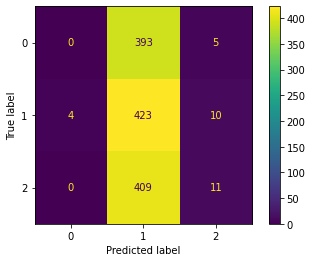

In [9]:
cm_display = ConfusionMatrixDisplay(cm).plot()

# Labelbezeichner: Wordnet

In [10]:
# 1. Load Testset
dt = pd.read_csv(base_path + '/sentiment_twitter/wordnet/dev.csv')
labels = dt['label']
text = dt['text']

# 2. Load Model
tars = TARSClassifier.load(base_path + '/sentiment_amazon/model/best-model.pt')

# 3. Run Test
results = []
classes = ['having the quality of something harmful or unpleasant',
           'one who does not side with any party in a war or dispute', 
           'involving advantage or good']

for sentence in text:
       sequence = Sentence(sentence)

       tars.predict_zero_shot(sequence, classes, multi_label = False)
       print(sequence)
       label = sequence.labels[0].value
       results.append(label)
       print(label)

# 4. Evaluate Results
y_true = labels
y_pred = results

report = classification_report(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
fisher = f1_score(y_true, y_pred, average='weighted')

2021-09-08 15:19:08,332 loading file /vol/fob-vol7/nebenf19/samahakk/masterarbeit_experiment2/sentiment_amazon/model/best-model.pt
init TARS
Sentence: "The jails are full so here is your sentence . Home detention with full entertainment package and guaranteed social security payment . # auspol"   [− Tokens: 24  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "@ user A start ! ! need ot deport all bad hombres fast day one . Allgans locked up or go back to El Salavador or wherever TF they are from !"   [− Tokens: 32  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "@ user @ user oh , and Hillary most likely did n't win the popular vote , considering how many illegal votes were casted"   [− Tokens: 24  − Sentence-Labels: {'label': [having the quality of something

Sentence: "SimCity delayed it \ u2019s availability"   [− Tokens: 6  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "Looking at today 's play at the # OpenChampionship You ca n't define Dustin Johnson 's round as anything other than a choke . Tied for 2nd worst"   [− Tokens: 28  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "@ user @ user @ user wrong again . U suck at research Just accept fact Hillary is a crook ."   [− Tokens: 21  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "DeMatha was shocked by Gonzaga on Saturday . Can the Stags regroup in time for the WCAC playoffs ? # mdpreps"   [− Tokens: 21  − Sentence-Labels: {'label': [one wh

Sentence: "Retweeted CaptainsLog2016 (@ CaptainsLog2016 ) : Voter Suppression / FraudFake NewsRussian HackersFBI Witch ..."   [− Tokens: 14  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "Saakashvili accused the government of trying to disrupt \ the Last winter with this Parliament \ # news # Russia"   [− Tokens: 20  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "Someone should have told Thor that sun in is just for hair and not for eyebrows"   [− Tokens: 16  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "@ user lmao \ u002c from a garage in Boro . My mate went in for drink on Sunday night but they wouldn \ u2019t serve him because it was too l

Sentence: "i can talk about Malcolm X all day ... like when i got kicked outta school in 8th and 9th grade for being too radical about Black Panthers"   [− Tokens: 28  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "@ user damn I don \ u2019t wanna get on my computer . Tomorrow :( my Harry feels are out of control and the outtakes video broke me"   [− Tokens: 28  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "Clearly an attempt to scare people people into supporting more gun control"   [− Tokens: 12  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "@ user ehh I 'm not impressed ... next time get the waves involved in the # MannequinChallenge"   [−

Sentence: "You 'd think I 'd be prepared for all the anguish when reading the Harry Potter books all over again for the 10th time . Right ? LIKE FUCK ."   [− Tokens: 30  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "PSA : These photos from the Charlie Hebdo attacks back in January . This is NOT what Paris looks like right now ."   [− Tokens: 23  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "@ user have no one to blame in the home opener loss - to the Pacers - Except themselves . Lots of bad shots in the 4th ! # Toronto # Raptors"   [− Tokens: 32  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "# StarWars # TheForceAwakens is opening at 5

Sentence: "Prithviraj Chauhan defeated Ghori 2 times and left him alive.but the 3th time Ghori killed him . Rahul Gandhi caught 2 times by NDA . 3rd ?"   [− Tokens: 27  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "I hope Tom Brady gets fucking clobbered about 699 times next Sunday"   [− Tokens: 12  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "Monsanto Hits All the Wrong Notes - NationofChange"   [− Tokens: 8  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "Hey @ user you need to drop that alt-right . Call them what they are KKK or white supremacists or nazis , NOT giv …"   [− Tokens: 25  − Sentence-Labels: {'label': [one who does not side wi

Sentence: "Yakub 's Mercy plea has been rejected . May you be served justice in here after . # YakubMemon"   [− Tokens: 19  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "@ user @ user @ user @ user sorry her shenanigans eclipse any real talent she may have. . at least Madonna was strategic w / shenanigans"   [− Tokens: 27  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "What if yall catch me on WorldStarHipHop tomorrow bc iGet arrested at the K.L. concert for trying to rape him thoo ._____ ."   [− Tokens: 23  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "American Own rejects Mosque , sued by Obama Administration ! # blackfriday # DayAfte

Sentence: "My nephew is moving to Florida tomorrow and he won \ u2019t even say bye to me . WHAT AN ASSHOLE ."   [− Tokens: 22  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "Steve Bannon : " I blame this liberal PC culture for the lack of a White Friday . Obama should be impeached for this ! ""   [− Tokens: 26  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "@ user @ user @ user @ user LIKE u , IS WHATS WRONG WITH SOCIETY THE CAST OF HAMILTON looked WEAK THANX2u"   [− Tokens: 23  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "SS but they have really good music and it \ u2019s a very sad thing that Mitch Lucker died may he rest in peace # 

Sentence: "Melania , unmuted : Melania Trump gave a speech using her own words,which reminded us why women ca n’t relate to her"   [− Tokens: 22  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "Tiff died and Ariel had a panic attack and Alonso went nuts and Mike sat there like a Barbie doll. . Katie talking about after prom"   [− Tokens: 26  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "I will not buy Mac makeup . Not because I am against animal testing,but because I cannot afford it ."   [− Tokens: 20  − Sentence-Labels: {'label': [involving advantage or good (0.3354)]}]
involving advantage or good
Sentence: "@ user if these refugees do n't want help from Christians ! Move on & amp ; help our own ppl 1st . Like our Vets ! Our Children in USA !"   [− Token

Sentence: "The externalities when Linux Foundation joins # microsoft GNUOpponents of # swpatsVictims of Microsoft 's patent extortion campaignTruth"   [− Tokens: 18  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "@ user @ user I 'm not eligible for Medicaid or subsidies . So I have a loophole called " ca n't afford it , you denied me ""   [− Tokens: 29  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "" Russian air crash kills ' almost all of KHL team Pavol Demitra,Karlis Skrastins,Ruslan Salei,Brad McCrimmon among the dead , may they all # RIP ""   [− Tokens: 26  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "Whenever I look Michael 

Sentence: "@ user YUP . And did you watch Degrassi from friday yet ? looool awkward campbell"   [− Tokens: 16  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "LIES ! You said that on Lana Del Rey 's new album there was a collab with Sam Smith and guess what ? It 's a fucking lie !"   [− Tokens: 29  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "@ user @ user The most problematic part was Steve Bannon not winning"   [− Tokens: 13  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "Aw what the hell Curtis Painter coming in and we give up 3rd and 18 conversion ."   [− Tokens: 17  − Sentence-Labels: {'label': [having the quality of something harmful or 

Sentence: "I need to go to sleep ! I have to take the CAHSEE tomorrow / :"   [− Tokens: 16  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "last day yahoo but i have already jotted 50ish to do items ... off to bulgaria tomorrow morning"   [− Tokens: 18  − Sentence-Labels: {'label': [involving advantage or good (0.3354)]}]
involving advantage or good
Sentence: "I see Scorsese may be teaming up with The Artist \ u2019s Oscar winning star Jean Dujardin ..."   [− Tokens: 18  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "" In Hastings , Nebraska , it 's illegal to have sex without wearing a night shirt . ""   [− Tokens: 19  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or 

Sentence: "@ user Lois Lerner has made her living trampling the 1st Amendment at the FEC and then the IRS ."   [− Tokens: 20  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "No disrespect to kendrick but march madness was the song of the year if not the greatest song of all time"   [− Tokens: 21  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "So Chris Evans seems to be the only editor of a national not in the MediaGuardian 100 ? That 's got to sting ."   [− Tokens: 24  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "@ user yes , I 'm going out in Port Credit tomorrow . Maybe Toronto on Friday night and then The Kee on Saturday . I 'm stayin

Sentence: "Car Charger , Maxboost 4.8A / 24W 2 Smart Port Car Charger [ Black ] for iPhone 7 6S Plus 6 P"   [− Tokens: 22  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "" Brain cells , good ass intro , Israel , the list continues"   [− Tokens: 13  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "" Preview of the December issue , out November 23 : Cate Blanchett styled by Christine Centenera and photographed by ..."   [− Tokens: 21  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "Who wants to see the Naruto movie with me in October"   [− Tokens: 11  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]

Sentence: "Images : Iniesta on the track to recovery # fcblive [ fcb ]"   [− Tokens: 13  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "Are we going to have a copy of Kane and lynch 2 : dog days to play tomorrow ?"   [− Tokens: 19  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "@ user @ user what a joke this is & trump says @ user I will not touch medicare or social security which one is it"   [− Tokens: 26  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "@ user @ user @ user interesting news is exciting - does n't mean she is being dishonest in her work ."   [− Tokens: 22  − Sentence-Labels: {'label': [having the quality of something harmful or

Sentence: "On Tuesday I will be wearing double Nike socks with leather sandals"   [− Tokens: 12  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "Check out this article : 5 things you may not know about David Bowie"   [− Tokens: 14  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "" This week marks the 34th anniversary of the death of Elvis Presley . Elvis died in Memphis on August 16 , 1977 at ..."   [− Tokens: 25  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "Yes \ u002c my friends revenge from Sunday \ u2019s game Chelsea have crushed Manchester United with five versus Quad"   [− Tokens: 20  − Sentence-Labels: {'label': [one who does not 

Sentence: "" It 's National Ice Cream Day . Or as we diabetics call it , Thursday ."   [− Tokens: 17  − Sentence-Labels: {'label': [involving advantage or good (0.3354)]}]
involving advantage or good
Sentence: "After the Blood Moon comes the Pumpkin Sun via @ user"   [− Tokens: 11  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "Erdogan wants new election Nov. 1 : Turkish president appears to be betting that a vote could revive the fortun ..."   [− Tokens: 21  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "I might go to Pierce the Veil at Northern Lights ( SOLD OUT ) in Albany \ u002c NY - Oct 31"   [− Tokens: 22  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in 

Sentence: "Leave @ user he does n't do animal testing the company does . Some face wash company 's DO animal testing and I do n't see u no buying it"   [− Tokens: 30  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "@ user My thoughts exactly ! Same with seniors hearing about loss of Medicare , hello , did you not hear of Paul Ryan ! ?"   [− Tokens: 26  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "I challenge Katie to stick pins in my eyes tomorrow . I dare you ."   [− Tokens: 15  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "Flashback-Nancy Pelosi : Hillary Clinton struggles with white men because of ' God ,' ' guns ,' and ' gays' via @

Sentence: "" We 'll be talking about Seth Rollins' # WWENOC Title Matches , # RAW & amp ; more # BustedOpenLive tomorrow from 2-4PM EST on @ user Rush Channel 93 ""   [− Tokens: 32  − Sentence-Labels: {'label': [involving advantage or good (0.3354)]}]
involving advantage or good
Sentence: "@ user @ user @ user When it 's Russia involved , it 's "" may "" . When Israel is involved , it 's "" has "" . Well done Amnesty for simplicity ""   [− Tokens: 35  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: ".@ Marvel \ u2019s Phase Two Kicks Off with \ u2019Iron Man 3 \ u2019 Trailer on October 23rd via @ user"   [− Tokens: 22  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "Markets have learned their lessons from Brexit and Trump and are keeping it cool"   [− Tokens

Sentence: "Sprint takes control of Clearwire ; now owns 51 % stake \ u002c may buy it outright"   [− Tokens: 17  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "You follow one Pope Francis account and Twitter goes bananas ."   [− Tokens: 11  − Sentence-Labels: {'label': [involving advantage or good (0.3354)]}]
involving advantage or good
Sentence: "@ user Yeah with Miss May I too . It \ u2019s on the 1st at Backstage Live"   [− Tokens: 18  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "Supporters that are supporting Ted Cruz , Rick Perry , & amp ; Sarah Palin & amp ; family-should look at the facts that their employer may think your also"   [− Tokens: 30  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the qu

Sentence: "# IAmTinaToo Stop # Cuadrilla from # fracking # BankruptCuadrilla # ECOCIDE"   [− Tokens: 12  − Sentence-Labels: {'label': [involving advantage or good (0.3354)]}]
involving advantage or good
Sentence: "Cubs beat Giants 8-6 to take first 3 from San Fran ! Kris Bryant hits 15th homer of the year !"   [− Tokens: 21  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "So is Modi ji going to Nagpur tomorrow to click selfie with the hangman and Yakub ?"   [− Tokens: 17  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "" we have still one schedule left,around 20-25 days work left with SRK . We finish that in Nov & amp ; then Raees is ready for next Eid - Ritesh ""   [− Tokens: 32  − Sentence-Labels: {'label': [one who does not side with any party in a war or

Sentence: "@ user Call me maybe is on the radio ... David Owen has to hear it tomorrow on our last day !"   [− Tokens: 22  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "Did a love of AC / DC just out the identity of Ashley Madison 's hacker ? : A love of AC / DC may have inadvertently ..."   [− Tokens: 28  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "@ user I saw Tenth Avenue North Saturday night and he sang part of Bad Blood ( talking about unforgiveness ) and Shut-up and Dance ."   [− Tokens: 26  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "I Want to be # UltimateNikeFan bt do n't hav any Nike Product.Hope dey will Send me some pro

Sentence: "Why switch to vegetarianism ?"   [− Tokens: 5  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "Christian is back with his # TheWalkingDead discussion on # TheCell ! # twd # TWDFamily # letstalk"   [− Tokens: 18  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "NBA NEWS : The New York Knicks will take on the Miami Heat at MSG on Saturday ( Australian Time ) in their season ..."   [− Tokens: 25  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "" There can be no tolerance of those who question the dignity of other people . " - Angela Merkel stood up to be counted"   [− Tokens: 25  − Sentence-Labels: {'label': [one who does not side with any 

Sentence: "" Shaker is going to have school tomorrow . There 's no doubt about that ... The really question is , am I gonna go ? ?""   [− Tokens: 27  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "I should go watch Ant-Man tomorrow because I really want to watch it and have yet to see it ."   [− Tokens: 20  − Sentence-Labels: {'label': [involving advantage or good (0.3354)]}]
involving advantage or good
Sentence: "" EVERYONE Pls Come Check out Necie 's Carnival Tomorrow !! ! We sell all the food you buy at a carnival FUNNEL CAKES , HOT DOGS , NACHOS & MORE ! !""   [− Tokens: 33  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "@ user TE QUIERO !< 3 please come to mexico !!!!!!!! ! greetings : 3 # worldwide have a nice day today & everyday :))"   [− Tokens: 25  − S

Sentence: "Photo : Understanding the Basics of Google Plus You may have heard people speaking about Google + . It is in ..."   [− Tokens: 22  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "@ user and hey tomorrows Friday we all get on Xbox and we all enjoy a little sesh on mw3 you down ?"   [− Tokens: 23  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "" Its my birthday tomorrow and it would make my day if @ user would finally follow me ! An add on PS4 would be awesome to , but I ca n't play ):""   [− Tokens: 34  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "Amy Schumer 's honest post may actually inspire you to strip down :"   [− Tokens:

Sentence: "Welcome Back all Friends after Eid Holidays . Today Tuesday 4 Shawal 1436 AH 21 July 2015 AD 6 Swan 2072 BJ Have a Nice day Take Care"   [− Tokens: 28  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "This Week in NYC : Sept. 8-13 - Monday Happy Labor Day ! We hoped you closed out the summer season with lots of time ..."   [− Tokens: 26  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "RUSHERS ! DO U WANT BTR on PCAs ? OCTOBER 27 TWEET / RT # BTRonPCAs ! Time : 3-6 PST / 6-9 EST # Time4Change Let 's get BTR nominated ! BTR deserves it !"   [− Tokens: 36  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "Win the Day the # Mannequ

Sentence: "@ user Finally able to see Paper Towns tomorrow . The excitement I am feeling is probably not ordinary but I just do n't care :)"   [− Tokens: 26  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "green day for nursing tomorrow ! finally get to use my lasallian shirts again lmao"   [− Tokens: 15  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "@ user ha ha ... Think I 've just come up with your # valentines social media campaign # lovestable - you need me on your marketing team ! !"   [− Tokens: 30  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "Arrived at the 2015 World Expo in Milan . Visited the Slovenia pavilion Such nice people . Be

Sentence: "@ user Oh ! Wow ! I must see it then ... Daniel Radcliffe is not one of my fave actors \ u002c but this may help me overcome my aversion ... : D x"   [− Tokens: 35  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "with the Wikileaks releases yesterday \ u002c it \ u2019s only gonna help 3rd party candidates make an impact in the election ."   [− Tokens: 23  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "There is still time to get over to the Gin Mill in Northampton-week 6 qualifying round Thursday night ! and facebook !"   [− Tokens: 22  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "Happy Birthday Nick J May you live long and Happy :)"   [−

Sentence: "Boruto : Naruto the Movie just wait brooo . im coming to you in november . Hall pasti dipenuhi dgn org dh besar hahaha"   [− Tokens: 24  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "" Kyle Seager hits hit 20th HR of the season ! It 's a 2-run bomb . Mariners lead the White Sox , 2-0 in the 1st . ""   [− Tokens: 29  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "@ user in London for Boro match Saturday ... let me know what night you \ u2019re out ... Friday may suit me better like if optional"   [− Tokens: 27  − Sentence-Labels: {'label': [involving advantage or good (0.3354)]}]
involving advantage or good
Sentence: "We are still going strong ! We 're open until 10 pm tonight ! All our regular sized Pops ! are 3 for $ 25 ! Exclusives incl

Sentence: "Just saw that I do n't have to stream the Panthers vs Packers game this Sunday # FUCKYES"   [− Tokens: 18  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "My 8 hour shift will consist of me thinking about Ed Sheeran tomorrow"   [− Tokens: 13  − Sentence-Labels: {'label': [involving advantage or good (0.3354)]}]
involving advantage or good
Sentence: "If you 're coming to Snoop Dogg this Saturday , please screenshot your receipt . If it 's purchased today , YOU GET ..."   [− Tokens: 24  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "Steve Bannon ’s First Pick For President - POLITICO Fascinating and says a lot about Bannon # StillWithHer # recount"   [− Tokens: 20  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.

Sentence: "Plus the new naruto game comes out in February and I 'm so unbelievably excited for that"   [− Tokens: 17  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "@ user I loved the Hawaii Rainbows . Out here in CA they used to show almost all their home games at around 11 PM on Sat Nights ."   [− Tokens: 29  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "" Congrats to Jan Bradley , one of our Jason Aldean ticket winners - enjoy the show and thanks for being a SKY4 fan !"   [− Tokens: 25  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "David Blaine is incredible . Everyone needs to check out his special on Netflix # WOW"   [− Tokens: 16 

Sentence: "" Yes , I can live today , if you give me tomorrow , as long as you follow . " Love me some Fleetwood Mac ! # vinylrecords"   [− Tokens: 29  − Sentence-Labels: {'label': [involving advantage or good (0.3354)]}]
involving advantage or good
Sentence: "kendrick was everything i wanted it to be a new danisnotonfire video on monday !"   [− Tokens: 15  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "Ben Amos doing well @ Hull City.Another clean sheet v Charlton.He says he \ u2019s enjoying the challenge of playing regular 1st team f \ u2019ball . # mufc"   [− Tokens: 29  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "" Welp I got 3 / 5 right for AOTY , Kendrick deserves it but it may come down to Taylor or The Weeknd ""   [− Tokens: 25  − Sentence-Labels: {'

Sentence: "I want Dunkin tomorrow"   [− Tokens: 4  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "Take me to IHOP 's $ 1 shortstack event tomorrow so I know it 's real ."   [− Tokens: 17  − Sentence-Labels: {'label': [involving advantage or good (0.3354)]}]
involving advantage or good
Sentence: "Marijuana on a Thursday with a new episode of Naruto"   [− Tokens: 10  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "Do you fancy coming on a tour of the BBC at MediaCityUK ? There 's availability on 15 September -"   [− Tokens: 20  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.3354)]}]
one who does not side with any party in a war or dispute
Sentence: "" Wondering how to spend this wet and windy Friday evening ? Come an

Sentence: "Completely agree @ user Serena tanked the 2nd set to let Venus win one and then she turned it up"   [− Tokens: 20  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "Back in Charleston tomorrow ! ! Let us know if you need any sharpenings ! ! Happy Thursday ! I hope your halloween was as fun as ours ! !"   [− Tokens: 30  − Sentence-Labels: {'label': [involving advantage or good (0.3354)]}]
involving advantage or good
Sentence: "oh yeah the boys in Raleigh tomorrow night yessirrr my first time at state hope it treat me righttttt"   [− Tokens: 19  − Sentence-Labels: {'label': [having the quality of something harmful or unpleasant (0.3354)]}]
having the quality of something harmful or unpleasant
Sentence: "I won the 2nd Star in my McLaren 12C in # CSRRacing # RaceYourFriends . Download FREE ! ez"   [− Tokens: 19  − Sentence-Labels: {'label': [one who does not side with a

In [11]:
print(report)

                                                          precision    recall  f1-score   support

   having the quality of something harmful or unpleasant       0.31      0.44      0.36       378
                             involving advantage or good       0.39      0.11      0.17       386
one who does not side with any party in a war or dispute       0.40      0.51      0.44       443

                                                accuracy                           0.36      1207
                                               macro avg       0.36      0.35      0.32      1207
                                            weighted avg       0.37      0.36      0.33      1207



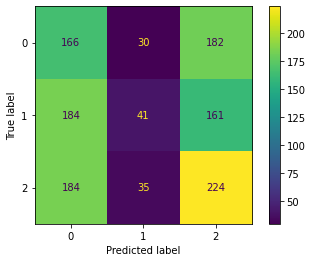

In [12]:
cm_display = ConfusionMatrixDisplay(cm).plot()